In [23]:
import string 
import re 
from numpy import array, argmax, random, take
import numpy as np
import pandas as pd 
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Embedding, Bidirectional, RepeatVector, TimeDistributed 
from keras.preprocessing.text import Tokenizer 
from keras.callbacks import ModelCheckpoint 
from keras.preprocessing. sequence import pad_sequences 
from keras.models import load_model 
from keras import optimizers 
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt 
% matplotlib inline 
pd.set_option('display.max_colwidth', 200)

In [ ]:
 def read_text(filename): 
    file = open(filename, mode='rt', encoding='utf-8')  
    text = file.read() 
    file.close() 
    return text

In [ ]:
def to_lines(text):
    sents = text.strip().split('\n')
    sents = [i.split('\t') for i in sents]
    return sents

In [ ]:
data = read_text("/content/deu.txt")
deu_eng = to_lines(data)
deu_eng = array(deu_eng)

In [ ]:
deu_eng = deu_eng[:50000,:]

In [ ]:
deu_eng

array([['Go.', 'Geh.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)'],
       ['Hi.', 'Hallo!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #380701 (cburgmer)'],
       ['Hi.', 'Grüß Gott!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #659813 (Esperantostern)'],
       ...,
       ['Tom has no free time.', 'Tom hat keine Freizeit.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #5007466 (CK) & #10095033 (wolfgangth)'],
       ['Tom has no neighbors.', 'Tom hat keine Nachbarn.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #5148452 (CK) & #7453873 (Pfirsichbaeumchen)'],
       ['Tom has nothing left.', 'Tom hat nichts mehr übrig.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #4500591 (CK) & #10095020 (wolfgangth)']],
      dtype='<U537')

In [ ]:
eng_1 = [] 
deu_1 = [] 
for i in deu_eng[:,0]: 
     eng_1.append(len(i.split()))
for i in deu_eng[:,1]: 
     deu_1.append(len(i.split()))

In [ ]:
length_df = pd.DataFrame({'eng':eng_1,'deu':deu_1})

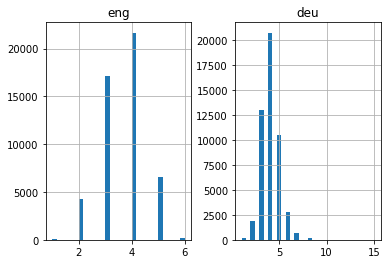

In [ ]:
length_df.hist(bins = 30)
plt.show()

In [ ]:
def tokenization(lines):
    tokenizer = Tokenizer() 
    tokenizer.fit_on_texts(lines) 
    return tokenizer

In [ ]:
eng_tokenizer = tokenization(deu_eng[ :, 0])               
eng_vocab_size= len(eng_tokenizer.word_index) + 1 
eng_length = 8
print('English Vocabulary Size: %d' % eng_vocab_size)

English Vocabulary Size: 6106


In [ ]:
deu_tokenizer = tokenization(deu_eng[ :, 1])               
deu_vocab_size= len(deu_tokenizer.word_index) + 1 
deu_length = 8
print('deutch Vocabulary Size: %d' % deu_vocab_size)

deutch Vocabulary Size: 10066


In [ ]:
def encode_sequences(tokenizer, length, lines):
    seq = tokenizer.texts_to_sequences(lines) 
    seq = pad_sequences(seq, maxlen=length, padding='post') 
    return seq

In [ ]:
from sklearn.model_selection import train_test_split 
train, test = train_test_split(deu_eng, test_size=0.2, random_state = 12)

In [ ]:
trainX = encode_sequences(deu_tokenizer, deu_length, train[:, 1]) 
trainY = encode_sequences(eng_tokenizer, eng_length, train[:, 0])

In [ ]:
testX = encode_sequences(deu_tokenizer, deu_length, test[:, 1]) 
testY = encode_sequences(eng_tokenizer, eng_length, test[:, 0])

In [ ]:
def build_model(in_vocab, out_vocab, in_timesteps, out_timesteps, units): 
    model = Sequential() 
    model.add(Embedding(in_vocab, units, input_length=in_timesteps, mask_zero=True))
    model.add(LSTM(units))
    model.add(RepeatVector(out_timesteps))
    model.add(LSTM(units, return_sequences=True)) 
    model.add(Dense(out_vocab, activation='softmax')) 
    return model

In [ ]:
model = build_model(deu_vocab_size, eng_vocab_size, deu_length, eng_length, 512)
rms = optimizers.RMSprop(learning_rate=0.001) 
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')

In [22]:
filename = 'model.Satyam.language_translation' 
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
history = model.fit(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1),
                     epochs=30, batch_size=512, 
                     validation_split = 0.2, 
                     callbacks=[checkpoint], verbose=1)

Epoch 1/30
63/63 [==============================] - ETA: 0s - loss: 3.3204
Epoch 1: val_loss improved from inf to 2.74326, saving model to model.Satyam.language_translation


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


63/63 [==============================] - 308s 5s/step - loss: 3.3204 - val_loss: 2.7433
Epoch 2/30
63/63 [==============================] - ETA: 0s - loss: 2.6907
Epoch 2: val_loss improved from 2.74326 to 2.68112, saving model to model.Satyam.language_translation


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


63/63 [==============================] - 300s 5s/step - loss: 2.6907 - val_loss: 2.6811
Epoch 3/30
63/63 [==============================] - ETA: 0s - loss: 2.5393
Epoch 3: val_loss improved from 2.68112 to 2.48766, saving model to model.Satyam.language_translation


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


63/63 [==============================] - 296s 5s/step - loss: 2.5393 - val_loss: 2.4877
Epoch 4/30
63/63 [==============================] - ETA: 0s - loss: 2.3614
Epoch 4: val_loss improved from 2.48766 to 2.37688, saving model to model.Satyam.language_translation


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


63/63 [==============================] - 296s 5s/step - loss: 2.3614 - val_loss: 2.3769
Epoch 5/30
63/63 [==============================] - ETA: 0s - loss: 2.2097
Epoch 5: val_loss improved from 2.37688 to 2.21585, saving model to model.Satyam.language_translation


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


63/63 [==============================] - 300s 5s/step - loss: 2.2097 - val_loss: 2.2159
Epoch 6/30
63/63 [==============================] - ETA: 0s - loss: 2.0653
Epoch 6: val_loss improved from 2.21585 to 2.10496, saving model to model.Satyam.language_translation


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


63/63 [==============================] - 303s 5s/step - loss: 2.0653 - val_loss: 2.1050
Epoch 7/30
63/63 [==============================] - ETA: 0s - loss: 1.9374
Epoch 7: val_loss improved from 2.10496 to 2.04370, saving model to model.Satyam.language_translation


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


63/63 [==============================] - 299s 5s/step - loss: 1.9374 - val_loss: 2.0437
Epoch 8/30
63/63 [==============================] - ETA: 0s - loss: 1.8265
Epoch 8: val_loss improved from 2.04370 to 1.94737, saving model to model.Satyam.language_translation


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


63/63 [==============================] - 299s 5s/step - loss: 1.8265 - val_loss: 1.9474
Epoch 9/30
63/63 [==============================] - ETA: 0s - loss: 1.7221
Epoch 9: val_loss improved from 1.94737 to 1.86804, saving model to model.Satyam.language_translation


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


63/63 [==============================] - 300s 5s/step - loss: 1.7221 - val_loss: 1.8680
Epoch 10/30
63/63 [==============================] - ETA: 0s - loss: 1.6235
Epoch 10: val_loss improved from 1.86804 to 1.79793, saving model to model.Satyam.language_translation


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


63/63 [==============================] - 299s 5s/step - loss: 1.6235 - val_loss: 1.7979
Epoch 11/30
63/63 [==============================] - ETA: 0s - loss: 1.5268
Epoch 11: val_loss improved from 1.79793 to 1.76784, saving model to model.Satyam.language_translation


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


63/63 [==============================] - 304s 5s/step - loss: 1.5268 - val_loss: 1.7678
Epoch 12/30
63/63 [==============================] - ETA: 0s - loss: 1.4367
Epoch 12: val_loss improved from 1.76784 to 1.68284, saving model to model.Satyam.language_translation


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


63/63 [==============================] - 295s 5s/step - loss: 1.4367 - val_loss: 1.6828
Epoch 13/30
63/63 [==============================] - ETA: 0s - loss: 1.3484
Epoch 13: val_loss improved from 1.68284 to 1.63591, saving model to model.Satyam.language_translation


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


63/63 [==============================] - 296s 5s/step - loss: 1.3484 - val_loss: 1.6359
Epoch 14/30
63/63 [==============================] - ETA: 0s - loss: 1.2673
Epoch 14: val_loss improved from 1.63591 to 1.58359, saving model to model.Satyam.language_translation


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


63/63 [==============================] - 295s 5s/step - loss: 1.2673 - val_loss: 1.5836
Epoch 15/30
63/63 [==============================] - ETA: 0s - loss: 1.1883
Epoch 15: val_loss improved from 1.58359 to 1.55439, saving model to model.Satyam.language_translation


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


63/63 [==============================] - 298s 5s/step - loss: 1.1883 - val_loss: 1.5544
Epoch 16/30
63/63 [==============================] - ETA: 0s - loss: 1.1143
Epoch 16: val_loss improved from 1.55439 to 1.51114, saving model to model.Satyam.language_translation


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


63/63 [==============================] - 295s 5s/step - loss: 1.1143 - val_loss: 1.5111
Epoch 17/30
63/63 [==============================] - ETA: 0s - loss: 1.0403
Epoch 17: val_loss improved from 1.51114 to 1.46783, saving model to model.Satyam.language_translation


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


63/63 [==============================] - 299s 5s/step - loss: 1.0403 - val_loss: 1.4678
Epoch 18/30
63/63 [==============================] - ETA: 0s - loss: 0.9734
Epoch 18: val_loss did not improve from 1.46783
63/63 [==============================] - 278s 4s/step - loss: 0.9734 - val_loss: 1.4799
Epoch 19/30
63/63 [==============================] - ETA: 0s - loss: 0.9084
Epoch 19: val_loss improved from 1.46783 to 1.40603, saving model to model.Satyam.language_translation


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


63/63 [==============================] - 297s 5s/step - loss: 0.9084 - val_loss: 1.4060
Epoch 20/30
63/63 [==============================] - ETA: 0s - loss: 0.8447
Epoch 20: val_loss improved from 1.40603 to 1.37692, saving model to model.Satyam.language_translation


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


63/63 [==============================] - 296s 5s/step - loss: 0.8447 - val_loss: 1.3769
Epoch 21/30
63/63 [==============================] - ETA: 0s - loss: 0.7867
Epoch 21: val_loss improved from 1.37692 to 1.35571, saving model to model.Satyam.language_translation


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


63/63 [==============================] - 297s 5s/step - loss: 0.7867 - val_loss: 1.3557
Epoch 22/30
63/63 [==============================] - ETA: 0s - loss: 0.7284
Epoch 22: val_loss improved from 1.35571 to 1.34487, saving model to model.Satyam.language_translation


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


63/63 [==============================] - 294s 5s/step - loss: 0.7284 - val_loss: 1.3449
Epoch 23/30
63/63 [==============================] - ETA: 0s - loss: 0.6756
Epoch 23: val_loss improved from 1.34487 to 1.33113, saving model to model.Satyam.language_translation


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


63/63 [==============================] - 303s 5s/step - loss: 0.6756 - val_loss: 1.3311
Epoch 24/30
63/63 [==============================] - ETA: 0s - loss: 0.6246
Epoch 24: val_loss improved from 1.33113 to 1.30029, saving model to model.Satyam.language_translation


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


63/63 [==============================] - 296s 5s/step - loss: 0.6246 - val_loss: 1.3003
Epoch 25/30
63/63 [==============================] - ETA: 0s - loss: 0.5782
Epoch 25: val_loss improved from 1.30029 to 1.28277, saving model to model.Satyam.language_translation


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


63/63 [==============================] - 298s 5s/step - loss: 0.5782 - val_loss: 1.2828
Epoch 26/30
63/63 [==============================] - ETA: 0s - loss: 0.5320
Epoch 26: val_loss did not improve from 1.28277
63/63 [==============================] - 278s 4s/step - loss: 0.5320 - val_loss: 1.2842
Epoch 27/30
63/63 [==============================] - ETA: 0s - loss: 0.4906
Epoch 27: val_loss improved from 1.28277 to 1.27744, saving model to model.Satyam.language_translation


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


63/63 [==============================] - 297s 5s/step - loss: 0.4906 - val_loss: 1.2774
Epoch 28/30
63/63 [==============================] - ETA: 0s - loss: 0.4537
Epoch 28: val_loss improved from 1.27744 to 1.25416, saving model to model.Satyam.language_translation


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


INFO:tensorflow:Assets written to: model.Satyam.language_translation/assets


63/63 [==============================] - 298s 5s/step - loss: 0.4537 - val_loss: 1.2542
Epoch 29/30
63/63 [==============================] - ETA: 0s - loss: 0.4149
Epoch 29: val_loss did not improve from 1.25416
63/63 [==============================] - 279s 4s/step - loss: 0.4149 - val_loss: 1.2543
Epoch 30/30
63/63 [==============================] - ETA: 0s - loss: 0.3806
Epoch 30: val_loss did not improve from 1.25416
63/63 [==============================] - 283s 4s/step - loss: 0.3806 - val_loss: 1.2599


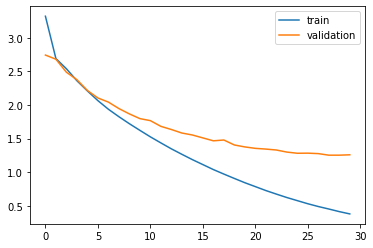

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.legend(['train', 'validation']) 
plt.show()

In [25]:
from keras.models import load_model
model = load_model('model.Satyam.language_translation/')
preds = np.argmax(model.predict(testX.reshape((testX.shape[0],testX.shape[1]))), axis=-1)

In [26]:
def get_word(n, tokenizer): 
    for word, index in tokenizer.word_index.items(): 
        if index == n: 
           return word
    return None

In [27]:
preds_text = [] 
for i in preds: 
    temp = [ ] 
    for j in range(len(i)): 
        t = get_word(i[j], eng_tokenizer) 
        if j > 0: 
            if (t == get_word(i[j-1], eng_tokenizer)) or (t == None): 
              temp.append(' ') 
            else:
              temp.append(t)
        else:
            if (t == None):
               temp.append(' ') 
            else: 
               temp.append(t) 
    preds_text.append(' '.join(temp))

In [28]:
pred_df = pd.DataFrame({'actual' : test[:,0], 'predicted' : preds_text})

In [29]:
pd.set_option('display.max_colwidth', 200)

In [30]:
pred_df.head(20)

,actual,predicted
0,Tom ordered a beer.,tom bought a beer
1,Tom voted.,tom was
2,Tom will quit.,tom'll quit
3,Show it to us.,show it to us
4,You have work to do.,you have a job
5,That was really fun.,it really fun
6,His roof was damaged.,his night was sour
7,Tom isn't a fighter.,tom isn't a rookie
8,I bought the car.,i bought the car
9,Tom will leave soon.,tom hates down


In [31]:
pred_df.tail(20)

,actual,predicted
9980,Sorry about earlier.,sorry to lunch
9981,Leave that to me.,i'll me that
9982,Tom doesn't agree.,tom isn't agree
9983,Can you pick up Tom?,can you pick at tom
9984,Did Tom come back?,is tom arrived
9985,I don't want meat.,i don't want fish
9986,Tom kicked Mary.,tom has
9987,Tom wasn't moving.,tom didn't
9988,I'm not very young.,i'm not very young
9989,You have my word.,you've stole my hat


In [32]:
pred_df.head(100)

,actual,predicted
0,Tom ordered a beer.,tom bought a beer
1,Tom voted.,tom was
2,Tom will quit.,tom'll quit
3,Show it to us.,show it to us
4,You have work to do.,you have a job
...,...,...
95,Tom wants to see us.,tom wants to see
96,Excuse my clumsiness.,excuse my
97,We studied French.,we learned french
98,This novel bores me.,this letter's me
